In [180]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [181]:
df = pd.read_csv('CustomerData.csv')

In [182]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [183]:
df.shape

(8950, 18)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Exploratory Data Analysis
### Missing Data

In [185]:
# Calculate missing values for each columns
missing_values =  df.isnull().sum() 

# Calculate the percentage of missing values for each column
missing_values_percent =  100 * df.isnull().sum() / len(df)

# Combine both missing values and percentage values dataframe
missing_values_table = pd.concat([missing_values, missing_values_percent], axis=1)

# Rename each of the columns
missing_values_table  = missing_values_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

# Remove column that does not contain any missing data
missing_values_table = missing_values_table[missing_values_table['Missing Values'] > 0]

# Sort the data from the highest missing columns
missing_values_table =  missing_values_table.sort_values(by='Missing Values', ascending=False)

In [186]:
missing_values_table

,Missing Values,% of Total Values
MINIMUM_PAYMENTS,313,3.497207
CREDIT_LIMIT,1,0.011173


##### Based on the Table there are only 2 columns with missing data and the percentage of all missing data is less than 5% 

In [187]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

##### Checking if there any other missing data.

In [188]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [189]:
# Drop the 'CUST_ID' column in place since it is not a features
df.drop('CUST_ID', axis=1, inplace=True)

# Count the data types of the remaining columns
dtype_counts = df.dtypes.value_counts()

# Display the counts of each data type
print(dtype_counts)

float64    14
int64       3
Name: count, dtype: int64


##### The number of numerical variable columns is 18 while the cetegorical variable columns is 0.

## Correlations
##### While the correlation coefficient is not the best method to represent a feature's "relevance," it does provide an indication of potential relationships within the data. Some general interpretations of the absolute value of the correlation coefficient include:

- .00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong”

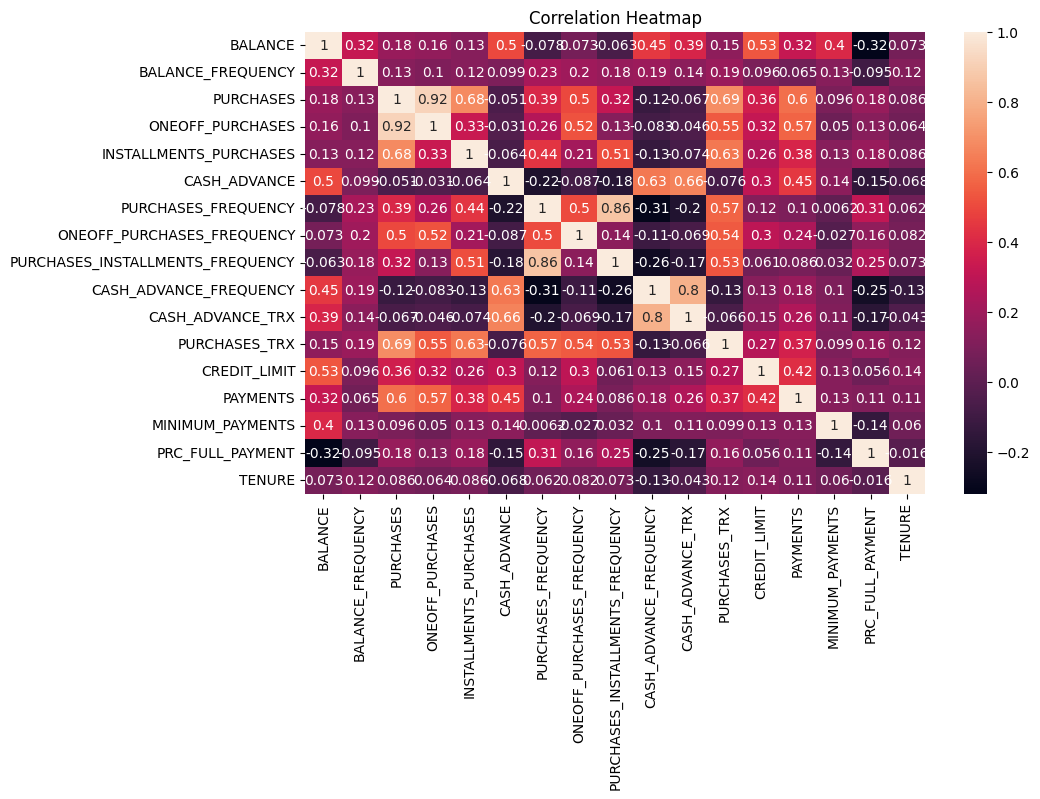

In [190]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Display the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix , annot = True)
plt.title('Correlation Heatmap')
plt.show()

In [191]:
# Extract the upper triangle of the correlation matrix, excluding the diagonal
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find the highest correlation
max_corr_value = upper_triangle.max().max()
max_corr_pair = np.unravel_index(np.nanargmax(upper_triangle.values), upper_triangle.shape)

# Find the lowest correlation
min_corr_value = upper_triangle.min().min()
min_corr_pair = np.unravel_index(np.nanargmin(upper_triangle.values), upper_triangle.shape)

# Get the corresponding feature names
max_corr_features = (corr_matrix.index[max_corr_pair[0]], corr_matrix.columns[max_corr_pair[1]])
min_corr_features = (corr_matrix.index[min_corr_pair[0]], corr_matrix.columns[min_corr_pair[1]])

print(f"Highest correlation: {max_corr_value:.2f} between {max_corr_features}")
print(f"Lowest correlation: {min_corr_value:.2f} between {min_corr_features}")

Highest correlation: 0.92 between ('PURCHASES', 'ONEOFF_PURCHASES')
Lowest correlation: -0.32 between ('BALANCE', 'PRC_FULL_PAYMENT')


## Clustering

In [192]:
X = df.values

# Within-cluster sum of squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


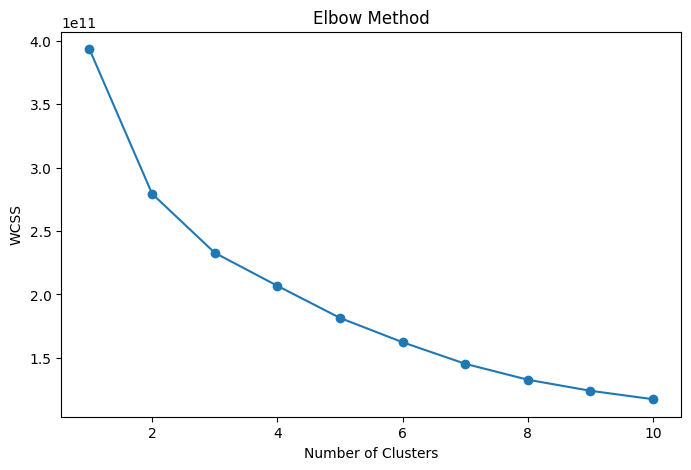

In [193]:
# Plotting the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

##### Based on the elbow method the number of cluster should be 6

In [194]:
# Applying KMeans with a specified number of clusters 
kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_kmeans = kmeans.fit_predict(X)

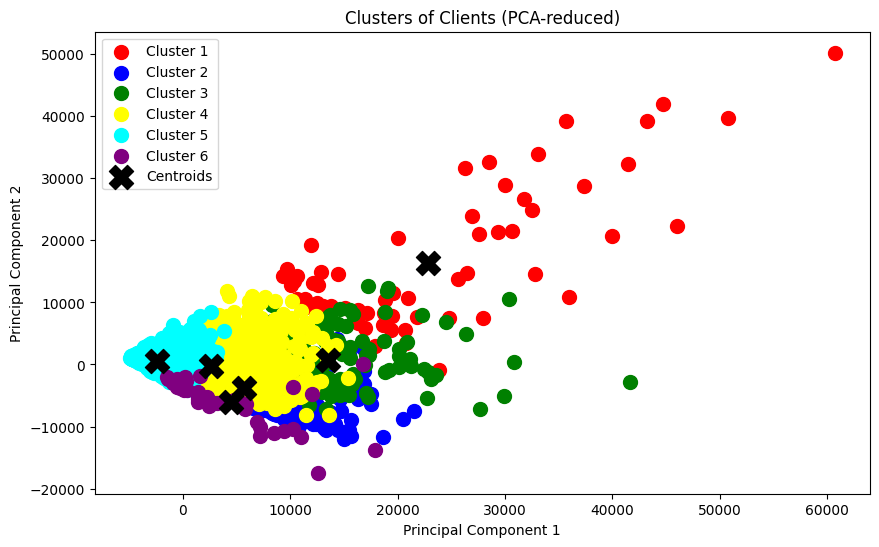

In [195]:
# Visualizing the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[y_kmeans == 0, 0], X_reduced[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_reduced[y_kmeans == 1, 0], X_reduced[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_reduced[y_kmeans == 2, 0], X_reduced[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_reduced[y_kmeans == 3, 0], X_reduced[y_kmeans == 3, 1], s=100, c='yellow', label='Cluster 4')
plt.scatter(X_reduced[y_kmeans == 4, 0], X_reduced[y_kmeans == 4, 1], s=100, c='cyan', label='Cluster 5')
plt.scatter(X_reduced[y_kmeans == 5, 0], X_reduced[y_kmeans == 5, 1], s=100, c='purple', label='Cluster 6')

# Plotting the centroids in reduced dimensions
centroids_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], s=300, c='black', marker='X', label='Centroids')

plt.title('Clusters of Clients (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()